### Possible graphs for nex contribution 

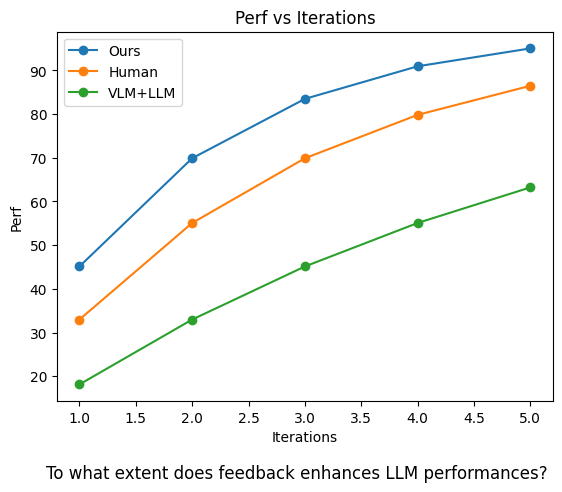

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# --- 1. Top-left curve: Performance vs Iterations ---
x = np.arange(1, 6)
y1 = 100 * (1 - np.exp(-0.6 * x))
y2 = 100 * (1 - np.exp(-0.4 * x))
y3 = 100 * (1 - np.exp(-0.2 * x))


plt.plot(x, y1, '-o', label="Ours")
plt.plot(x, y2, '-o', label="Human")
plt.plot(x, y3, '-o', label="VLM+LLM")
plt.xlabel("Iterations")
plt.ylabel("Perf")
plt.legend()
plt.title("Perf vs Iterations")
txt="To what extent does feedback enhances LLM performances?"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

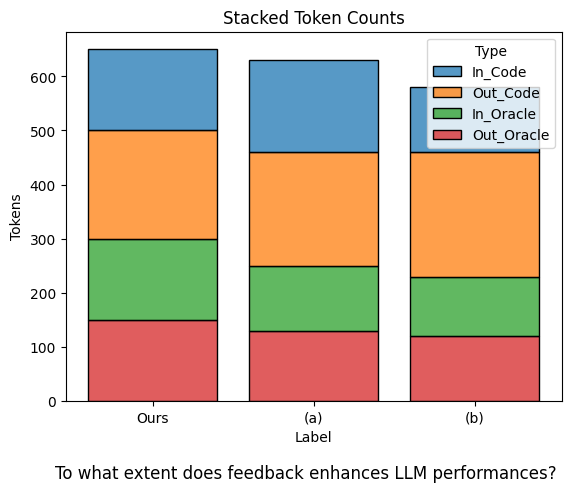

In [ ]:
# --- 2. Top-center bar chart: Output Quality ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Ours', '(a)', '(b)']
input_tok_in_code = [150, 170, 120]
input_tok_out_code = [200, 210, 230]
input_tok_in_oracle = [150, 120, 110]
input_tok_out_oracle = [150, 130, 120]

df = pd.DataFrame({
    "Label": labels,
    "In_Code": input_tok_in_code,
    "Out_Code": input_tok_out_code,
    "In_Oracle": input_tok_in_oracle,
    "Out_Oracle": input_tok_out_oracle
})

# melt to long format
df_melted = df.melt(id_vars="Label", var_name="Type", value_name="Tokens")

# stacked bars with histplot
sns.histplot(
    data=df_melted,
    x="Label",
    weights="Tokens",
    hue="Type",
    multiple="stack",
    shrink=0.8,
)

txt="How does token usage differ between solutions?"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.ylabel("Tokens")
plt.title("Stacked Token Counts")
plt.show()


In [29]:

# --- 3. Middle-left table: Performance per gen ---
import pandas as pd
import numpy as np
import random

data = {
    "avg tries code gen.": [round(random.uniform(1,3),2) for _ in range(3)],
    "avg tries oracles gen": [round(random.uniform(1,3),2) for _ in range(3)],
    "total failed code gen.": [random.randrange(3,5) for _ in range(3)],
    "total failed oracle gen.": [random.randrange(5,8) for _ in range(3)],
}

df = pd.DataFrame(data, index=["Ours", "[1]", "[2]"])

df


,avg tries code gen.,avg tries oracles gen,total failed code gen.,total failed oracle gen.
Ours,2.43,1.58,3,5
[1],2.63,1.77,3,7
[2],1.31,2.34,4,5


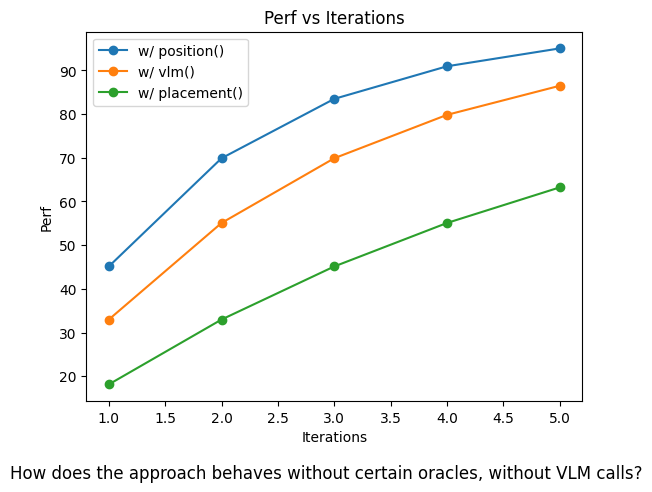

In [31]:

# --- 4.  Performance vs Iterations - ablation---
x = np.arange(1, 6)
y1 = 100 * (1 - np.exp(-0.6 * x))
y2 = 100 * (1 - np.exp(-0.4 * x))
y3 = 100 * (1 - np.exp(-0.2 * x))


plt.plot(x, y1, '-o', label="w/ position()")
plt.plot(x, y2, '-o', label="w/ vlm()")
plt.plot(x, y3, '-o', label="w/ placement()")
plt.xlabel("Iterations")
plt.ylabel("Perf")
plt.legend()
plt.title("Perf vs Iterations")
txt="How does the approach behaves without certain oracles, without VLM calls?"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

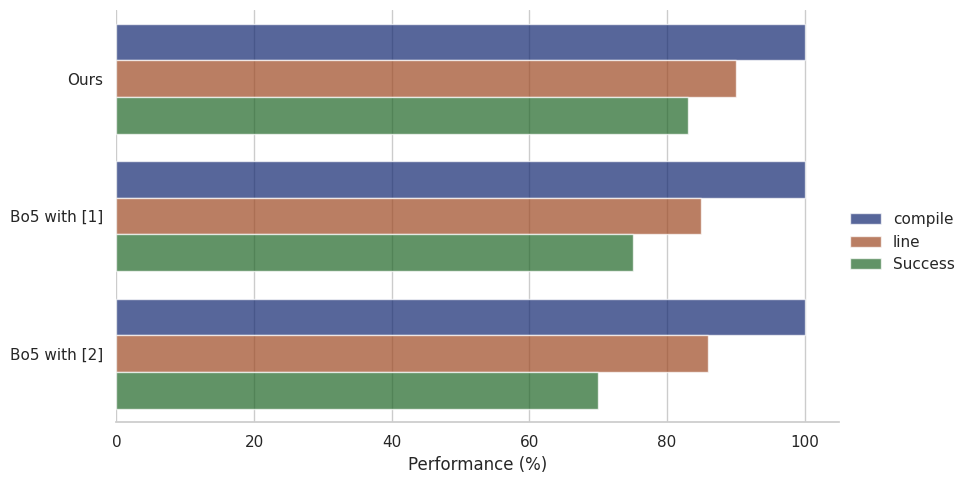

In [ ]:

# --- 4. Bottom-left: Lines showing BoN coverage ---
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")

df = pd.DataFrame({
    "solution": ["Ours", "Bo5 with [1]", "Bo5 with [2]"],
    "compile": [100, 100, 100],
    "line": [90, 85, 86],
    "Success": [83, 75, 70]
})

# reshape to long form
df_long = df.melt(id_vars="solution", var_name="perf_type", value_name="perf.")

# plot
g = sns.catplot(
    data=df_long, kind="bar",
    y="solution", x="perf.", hue="perf_type",
    palette="dark", alpha=.7, height=5,aspect=1.8
)
g.despine(left=True)
g.set_axis_labels("Performance (%)", "")
g.legend.set_title("")
txt="How does our approach compares to Best Of N Sampling?"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


/tmp/ipykernel_21728/865743111.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


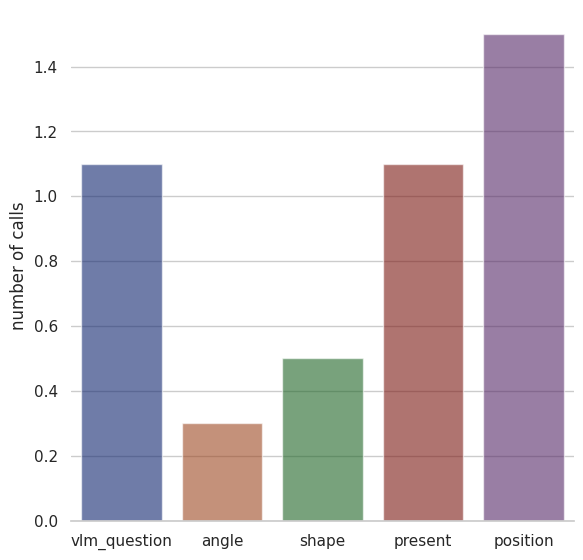

In [54]:

# --- 5. Bottom-right: Radar chart ---
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Ours'],
'vlm_question': [1.1],
'angle': [0.3],
'shape': [0.5],
'present': [1.1],
'position': [1.5]
})
df_long = df.melt(id_vars="group", var_name="call_type", value_name="avg.")

 
g = sns.catplot(
    data=df_long, kind="bar",
    x="call_type", y="avg.", 
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "number of calls")
